## Section 0: Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

from numpy.linalg import norm, pinv
from scipy.stats import kurtosis

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, silhouette_score

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.cluster import KMeans
from sklearn.random_projection import GaussianRandomProjection
from sklearn.neural_network import MLPClassifier

## Section 1: Apply Clustering Algorithms
### 1.1. Load Data & Normalize

In [2]:
randomization_seed = 42 
np.random.seed(randomization_seed)

# Load the data
spam_data = pd.read_csv('./datasets/spam_dataset.csv')
cancer_data = pd.read_csv('./datasets/breast_cancer_dataset.csv')

# Separate the features and the target 'label' column
spam_features = spam_data.drop('target', axis=1)
spam_labels = spam_data['target']
cancer_features = cancer_data.drop('target', axis=1)
cancer_labels = cancer_data['target']

# Split the data into training and testing sets
spam_features_train_unscaled, spam_features_test_unscaled, spam_labels_train, spam_labels_test = train_test_split(spam_features, spam_labels, test_size=0.2, random_state=randomization_seed)
cancer_features_train_unscaled, cancer_features_test_unscaled, cancer_labels_train, cancer_labels_test = train_test_split(cancer_features, cancer_labels, test_size=0.2, random_state=randomization_seed)


# Normalize the data
scaler = StandardScaler()
spam_features_train = scaler.fit_transform(spam_features_train_unscaled)
spam_features_test = scaler.transform(spam_features_test_unscaled)
cancer_features_train = scaler.fit_transform(cancer_features_train_unscaled)
cancer_features_test = scaler.transform(cancer_features_test_unscaled)

#### 1.2 - Expectation Maximization (Gaussian Mixture Model)

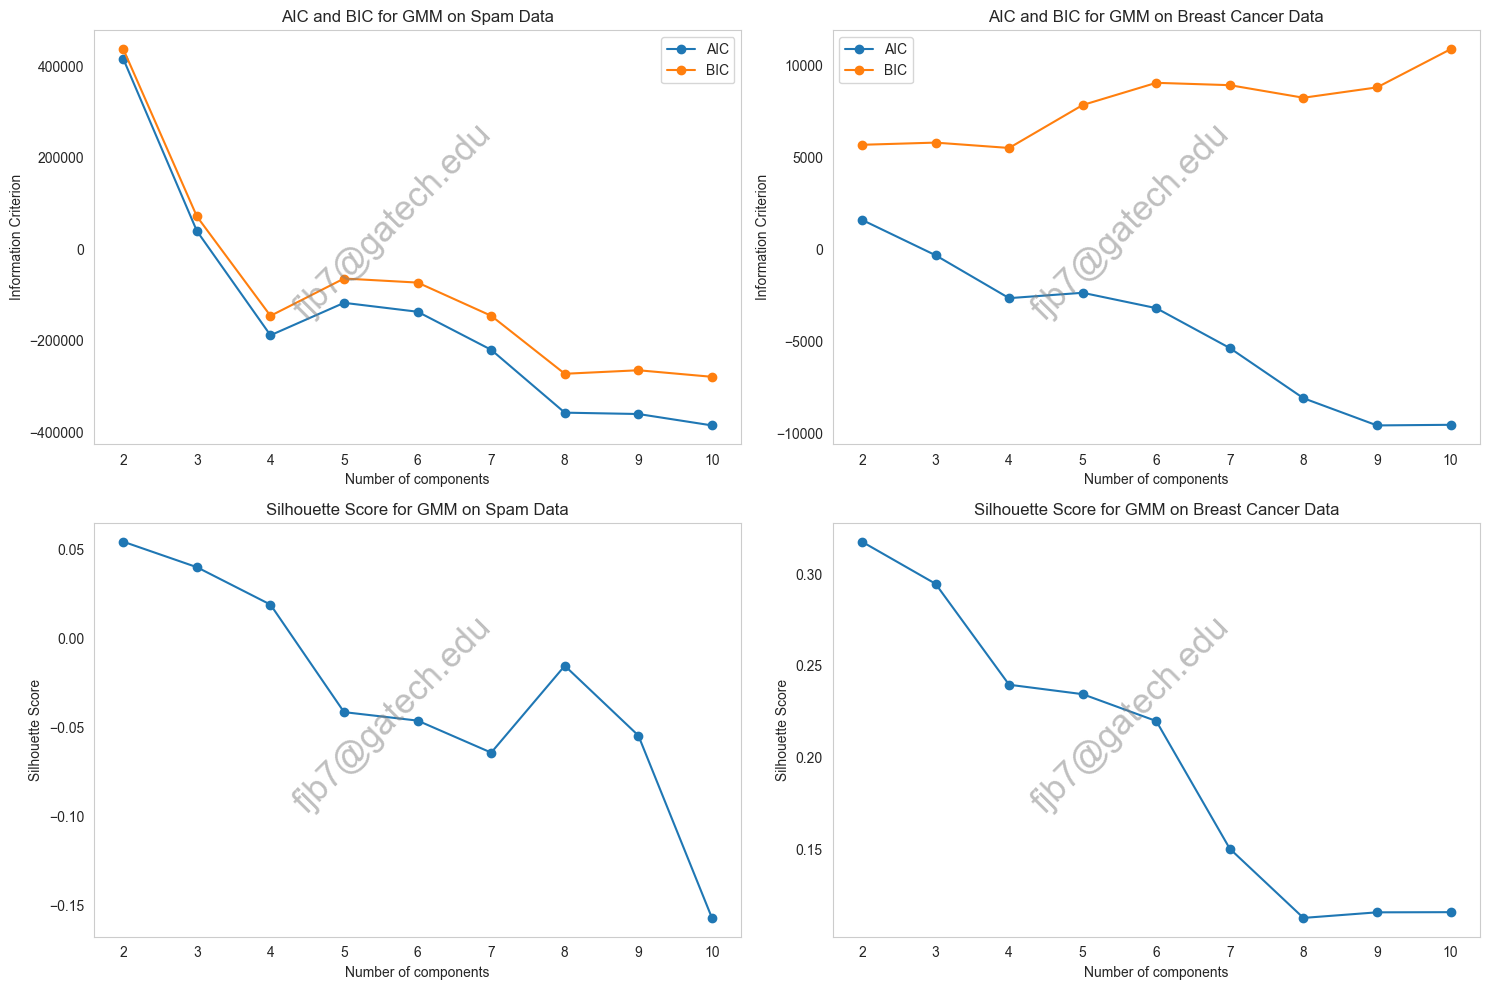

In [3]:
# Set up the subplot grid
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# AIC and BIC for GMM on Spam Data
n_components = np.arange(2, 11)
models_spam = [GaussianMixture(n, covariance_type='full', random_state=randomization_seed).fit(spam_features_train) for n in n_components]
aic_spam = [m.aic(spam_features_train) for m in models_spam]
bic_spam = [m.bic(spam_features_train) for m in models_spam]

axs[0, 0].plot(n_components, aic_spam, label='AIC', marker='o')
axs[0, 0].plot(n_components, bic_spam, label='BIC', marker='o')
axs[0, 0].set_title('AIC and BIC for GMM on Spam Data')
axs[0, 0].annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
axs[0, 0].set_xlabel('Number of components')
axs[0, 0].set_ylabel('Information Criterion')
axs[0, 0].legend()
axs[0, 0].grid()

# AIC and BIC for GMM on Breast Cancer Data
models_cancer = [GaussianMixture(n, covariance_type='full', random_state=randomization_seed).fit(cancer_features_train) for n in n_components]
aic_cancer = [m.aic(cancer_features_train) for m in models_cancer]
bic_cancer = [m.bic(cancer_features_train) for m in models_cancer]

axs[0, 1].plot(n_components, aic_cancer, label='AIC', marker='o')
axs[0, 1].plot(n_components, bic_cancer, label='BIC', marker='o')
axs[0, 1].annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
axs[0, 1].set_title('AIC and BIC for GMM on Breast Cancer Data')
axs[0, 1].set_xlabel('Number of components')
axs[0, 1].set_ylabel('Information Criterion')
axs[0, 1].legend()
axs[0, 1].grid()

# Silhouette Score for GMM on Spam Data
silhouette_scores_spam = []
for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=randomization_seed).fit(spam_features_train)
    labels = gmm.predict(spam_features_train)
    silhouette_scores_spam.append(silhouette_score(spam_features_train, labels))

axs[1, 0].plot(n_components, silhouette_scores_spam, marker='o')
axs[1, 0].set_title('Silhouette Score for GMM on Spam Data')
axs[1, 0].annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
axs[1, 0].set_xlabel('Number of components')
axs[1, 0].set_ylabel('Silhouette Score')
axs[1, 0].grid()

# Silhouette Score for GMM on Breast Cancer Data
silhouette_scores_cancer = []
for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=randomization_seed).fit(cancer_features_train)
    labels = gmm.predict(cancer_features_train)
    silhouette_scores_cancer.append(silhouette_score(cancer_features_train, labels))

axs[1, 1].plot(n_components, silhouette_scores_cancer, marker='o')
axs[1, 1].set_title('Silhouette Score for GMM on Breast Cancer Data')
axs[1, 1].annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
axs[1, 1].set_xlabel('Number of components')
axs[1, 1].set_ylabel('Silhouette Score')
axs[1, 1].grid()

plt.tight_layout()
plt.show()

In [4]:
# Apply Gaussian Mixture Model
gmm_spam, gmm_cancer = GaussianMixture(n_components=4, random_state=randomization_seed), GaussianMixture(n_components=2, random_state=randomization_seed)
gmm_spam.fit(spam_features_train)
gmm_cancer.fit(cancer_features_train)

# Fetch Cluster Labels
labels_spam_gmm = gmm_spam.predict(spam_features_train)
labels_cancer_gmm = gmm_cancer.predict(cancer_features_train)

#### 1.3 - K-Means Clustering

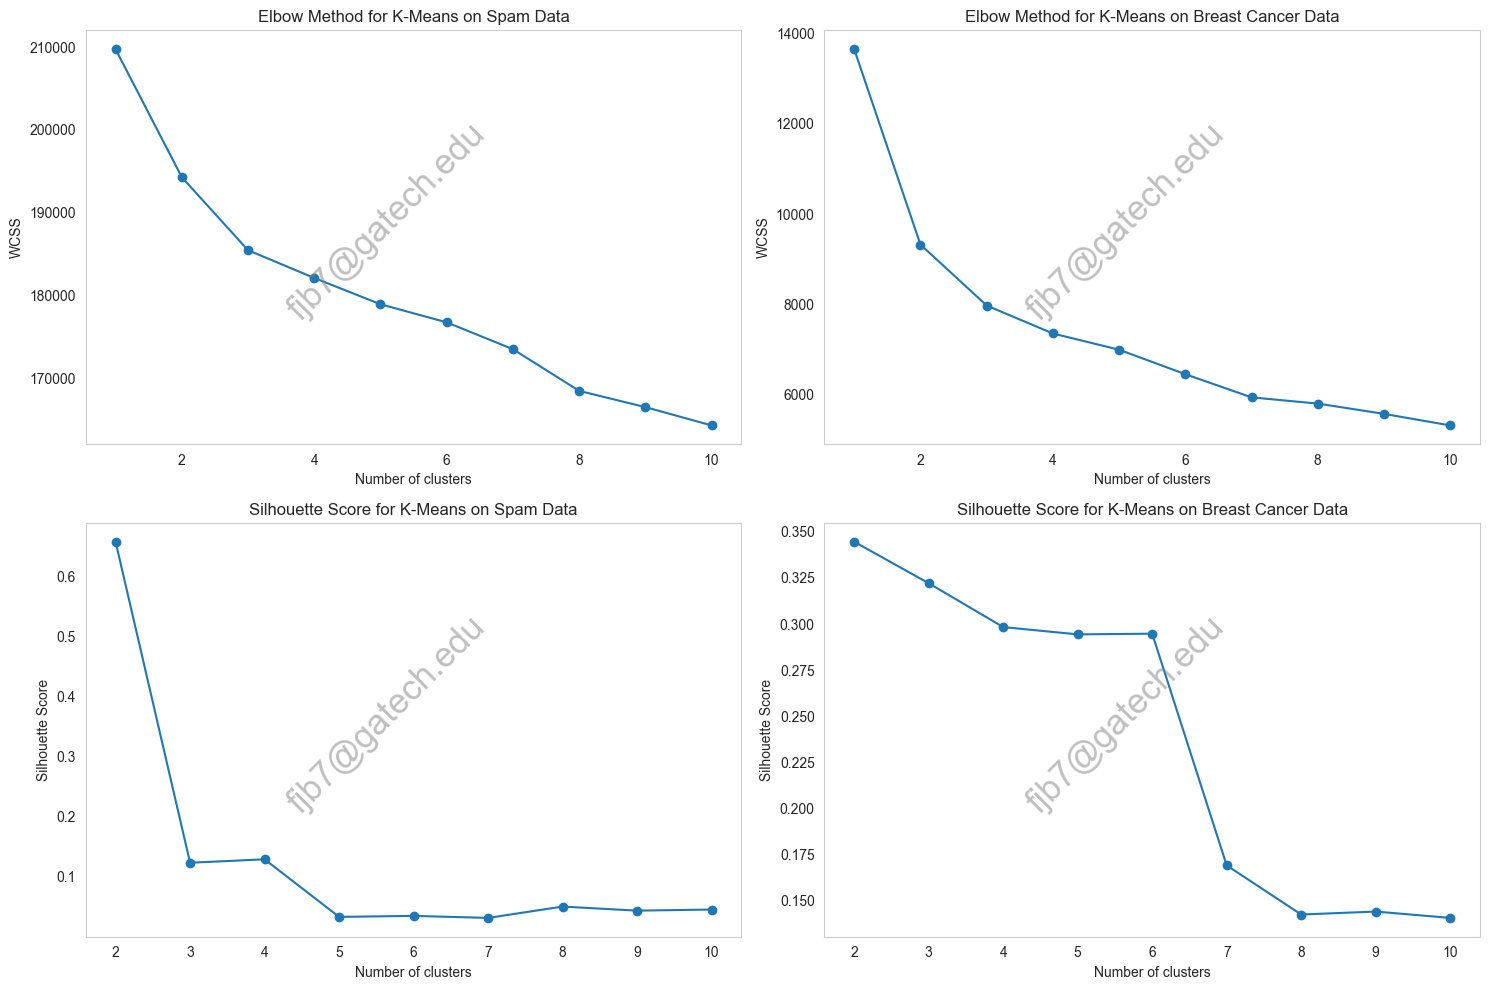

In [5]:
# Set up the subplot grid
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Elbow Method for K-Means on Spam Data
wcss_spam = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=randomization_seed).fit(spam_features_train)
    wcss_spam.append(kmeans.inertia_)

axs[0, 0].plot(range(1, 11), wcss_spam, marker='o')
axs[0, 0].set_title('Elbow Method for K-Means on Spam Data')
axs[0, 0].annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
axs[0, 0].set_xlabel('Number of clusters')
axs[0, 0].set_ylabel('WCSS')
axs[0, 0].grid()

# Elbow Method for K-Means on Breast Cancer Data
wcss_cancer = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=randomization_seed).fit(cancer_features_train)
    wcss_cancer.append(kmeans.inertia_)

axs[0, 1].plot(range(1, 11), wcss_cancer, marker='o')
axs[0, 1].annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
axs[0, 1].set_title('Elbow Method for K-Means on Breast Cancer Data')
axs[0, 1].set_xlabel('Number of clusters')
axs[0, 1].set_ylabel('WCSS')
axs[0, 1].grid()

# Silhouette Score for K-Means on Spam Data
silhouette_scores_spam = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=randomization_seed).fit(spam_features_train)
    silhouette_scores_spam.append(silhouette_score(spam_features_train, kmeans.labels_))

axs[1, 0].plot(range(2, 11), silhouette_scores_spam, marker='o')
axs[1, 0].annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
axs[1, 0].set_title('Silhouette Score for K-Means on Spam Data')
axs[1, 0].set_xlabel('Number of clusters')
axs[1, 0].set_ylabel('Silhouette Score')
axs[1, 0].grid()

# Silhouette Score for K-Means on Breast Cancer Data
silhouette_scores_cancer = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=randomization_seed).fit(cancer_features_train)
    silhouette_scores_cancer.append(silhouette_score(cancer_features_train, kmeans.labels_))

axs[1, 1].plot(range(2, 11), silhouette_scores_cancer, marker='o')
axs[1, 1].annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
axs[1, 1].set_title('Silhouette Score for K-Means on Breast Cancer Data')
axs[1, 1].set_xlabel('Number of clusters')
axs[1, 1].set_ylabel('Silhouette Score')
axs[1, 1].grid()

plt.tight_layout()
plt.show()

In [6]:
# Apply K-Means on datasets
kmeans_spam, kmeans_cancer = KMeans(n_clusters=2, random_state=randomization_seed), KMeans(n_clusters=3, random_state=randomization_seed)
kmeans_spam.fit(spam_features_train)
kmeans_cancer.fit(cancer_features_train)

# Get Cluster Labels
labels_spam_kmeans = kmeans_spam.labels_
labels_cancer_kmeans = kmeans_cancer.labels_

## Section 2: Apply Dimensionality Reduction Algorithms

### 2.1 - Linear Algorithms

#### 2.1.1 - PCA

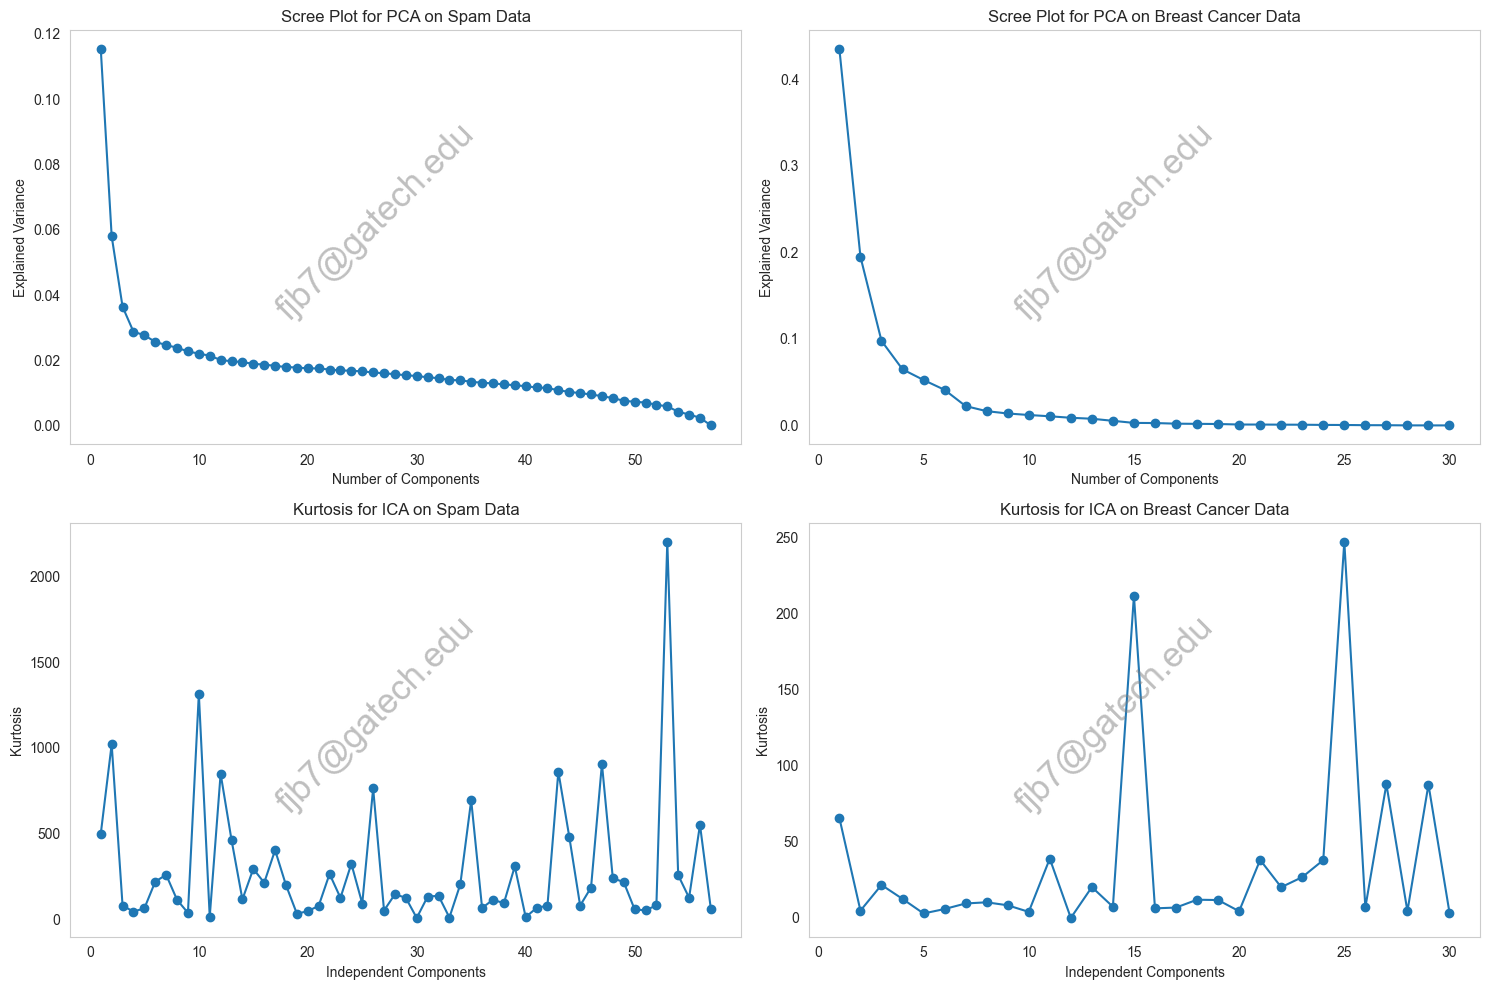

In [7]:
# Set up the subplot grid
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Scree Plot for PCA on Spam Data
pca_spam = PCA(n_components=min(spam_features_train.shape), random_state=42).fit(spam_features_train)
explained_variance_spam = pca_spam.explained_variance_ratio_
axs[0, 0].plot(np.arange(1, len(explained_variance_spam) + 1), explained_variance_spam, marker='o')
axs[0, 0].set_title('Scree Plot for PCA on Spam Data')
axs[0, 0].annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
axs[0, 0].set_xlabel('Number of Components')
axs[0, 0].set_ylabel('Explained Variance')
axs[0, 0].grid()

# Scree Plot for PCA on Breast Cancer Data
pca_cancer = PCA(n_components=min(cancer_features_train.shape), random_state=42).fit(cancer_features_train)
explained_variance_cancer = pca_cancer.explained_variance_ratio_
axs[0, 1].plot(np.arange(1, len(explained_variance_cancer) + 1), explained_variance_cancer, marker='o')
axs[0 ,1].annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
axs[0, 1].set_title('Scree Plot for PCA on Breast Cancer Data')
axs[0, 1].set_xlabel('Number of Components')
axs[0, 1].set_ylabel('Explained Variance')
axs[0, 1].grid()

# Kurtosis for ICA on Spam Data
ica_spam = FastICA(n_components=min(spam_features_train.shape), random_state=42).fit(spam_features_train)
kurtosis_spam = kurtosis(ica_spam.transform(spam_features_train), axis=0, fisher=True)
axs[1, 0].plot(np.arange(1, len(kurtosis_spam) + 1), kurtosis_spam, marker='o')
axs[1, 0].annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
axs[1, 0].set_title('Kurtosis for ICA on Spam Data')
axs[1, 0].set_xlabel('Independent Components')
axs[1, 0].set_ylabel('Kurtosis')
axs[1, 0].grid()

# Kurtosis for ICA on Breast Cancer Data
ica_cancer = FastICA(n_components=min(cancer_features_train.shape), random_state=42).fit(cancer_features_train)
kurtosis_cancer = kurtosis(ica_cancer.transform(cancer_features_train), axis=0, fisher=True)
axs[1, 1].plot(np.arange(1, len(kurtosis_cancer) + 1), kurtosis_cancer, marker='o')
axs[1,1].annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
axs[1, 1].set_title('Kurtosis for ICA on Breast Cancer Data')
axs[1, 1].set_xlabel('Independent Components')
axs[1, 1].set_ylabel('Kurtosis')
axs[1, 1].grid()

plt.tight_layout()
plt.show()

In [8]:
# Apply PCA
pca_spam, pca_cancer = PCA(n_components=2, random_state=randomization_seed), PCA(n_components=3, random_state=randomization_seed)
spam_pca = pca_spam.fit_transform(spam_features_train)
cancer_pca = pca_cancer.fit_transform(cancer_features_train)

#### 2.1.2 ICA

In [9]:
# Apply ICA
ica_spam, ica_cancer = FastICA(n_components=55, random_state=randomization_seed), FastICA(n_components=25, random_state=randomization_seed)
spam_ica = ica_spam.fit_transform(spam_features_train)
cancer_ica = ica_cancer.fit_transform(cancer_features_train)

#### 2.1.3 Randomized Projections

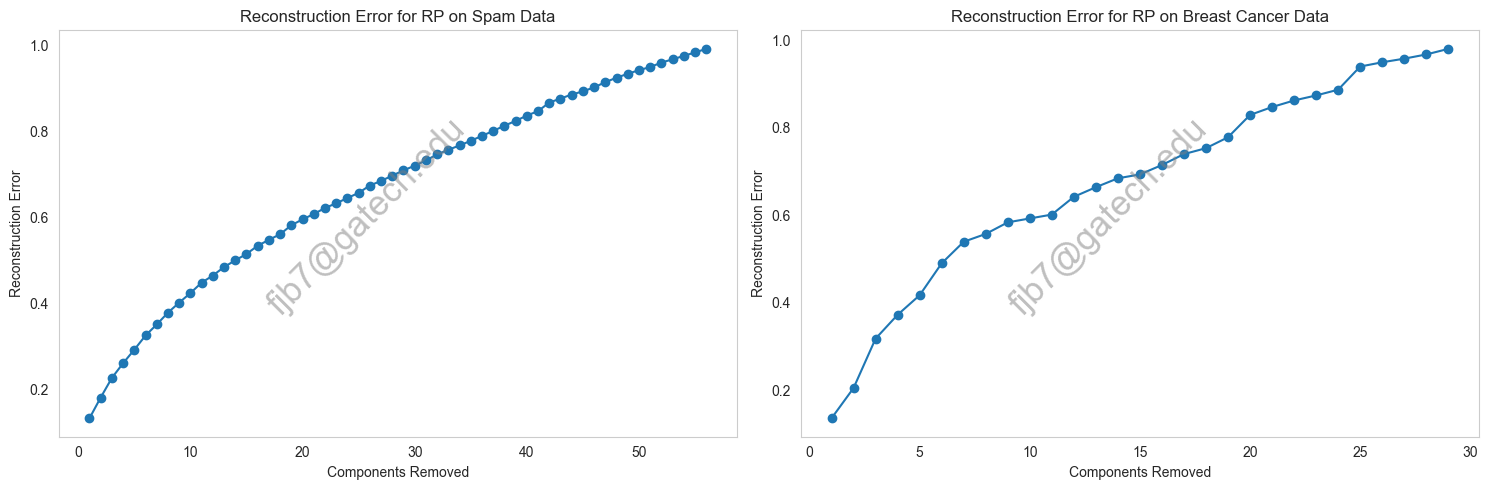

In [10]:
# Assume spam_features_train and cancer_features_train are the original training data you want to project
n_features_spam = spam_features_train.shape[1]
n_features_cancer = cancer_features_train.shape[1]

reconstruction_errors_spam = []
reconstruction_errors_cancer = []

# Calculate reconstruction error for different numbers of retained components for Spam
for n_components in range(1, n_features_spam):
    rp = GaussianRandomProjection(n_components=n_components, random_state=42)
    rp.fit(spam_features_train)
    components = rp.components_
    reduced_data = rp.transform(spam_features_train)
    reconstruction = reduced_data.dot(pinv(components.T))
    error = norm(spam_features_train - reconstruction, 'fro') / norm(spam_features_train, 'fro')
    reconstruction_errors_spam.append(error)

# Calculate reconstruction error for different numbers of retained components for Cancer
for n_components in range(1, n_features_cancer):
    rp = GaussianRandomProjection(n_components=n_components, random_state=42)
    rp.fit(cancer_features_train)
    components = rp.components_
    reduced_data = rp.transform(cancer_features_train)
    reconstruction = reduced_data.dot(pinv(components.T))
    error = norm(cancer_features_train - reconstruction, 'fro') / norm(cancer_features_train, 'fro')
    reconstruction_errors_cancer.append(error)

# Plot the reconstruction error on a 1x2 grid
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot for Spam data
components_removed_spam = np.arange(n_features_spam - 1, 0, -1)  # Number of components removed
axs[0].plot(components_removed_spam, reconstruction_errors_spam, marker='o')
axs[0].annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
axs[0].set_title('Reconstruction Error for RP on Spam Data')
axs[0].set_xlabel('Components Removed')
axs[0].set_ylabel('Reconstruction Error')
axs[0].grid()

# Plot for Breast Cancer data
components_removed_cancer = np.arange(n_features_cancer - 1, 0, -1)  # Number of components removed
axs[1].plot(components_removed_cancer, reconstruction_errors_cancer, marker='o')
axs[1].annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
axs[1].set_title('Reconstruction Error for RP on Breast Cancer Data')
axs[1].set_xlabel('Components Removed')
axs[1].set_ylabel('Reconstruction Error')
axs[1].grid()

plt.tight_layout()
plt.show()

In [11]:
rp_spam, rp_cancer = GaussianRandomProjection(n_components=2, random_state=randomization_seed), GaussianRandomProjection(n_components=2, random_state=42)
spam_rp = rp_spam.fit_transform(spam_features_train)
cancer_rp = rp_cancer.fit_transform(cancer_features_train)

### 2.2 Non-Linear Manifold Algorithm (t-SNE)

In [12]:
from sklearn.manifold import TSNE

tsne_spam, tsne_cancer = TSNE(n_components=2, random_state=randomization_seed), TSNE(n_components=2, random_state=42)
spam_tsne = tsne_spam.fit_transform(spam_features_train)
cancer_tsne = tsne_cancer.fit_transform(cancer_features_train)

### 2.3 - Plot Data

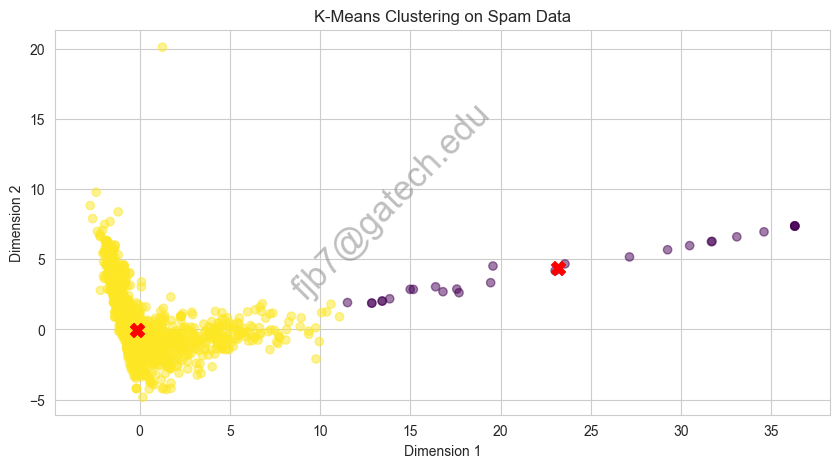

In [13]:
# For K-Means Clustering on Spam Data
plt.figure(figsize=(10, 5))
plt.scatter(spam_pca[:, 0], spam_pca[:, 1], c=labels_spam_kmeans, cmap="viridis", alpha=0.5)
centroids_spam_kmeans = kmeans_spam.cluster_centers_
centroids_spam_kmeans_pca = pca_spam.transform(centroids_spam_kmeans)
plt.scatter(centroids_spam_kmeans_pca[:, 0], centroids_spam_kmeans_pca[:, 1], c='red', marker='X', s=100)
plt.title('K-Means Clustering on Spam Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.show()

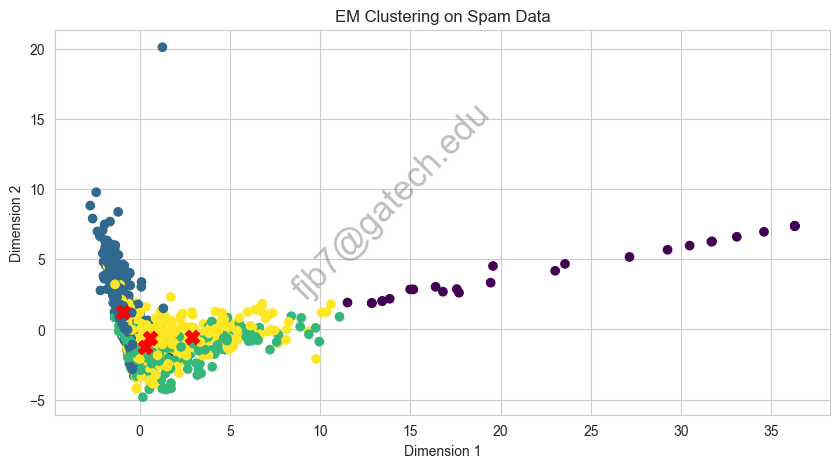

In [14]:
# Plot for Spam Data
plt.figure(figsize=(10, 5))
centroids_spam_gmm = gmm_spam.means_
centroids_spam_gmm_pca = pca_spam.transform(centroids_spam_gmm)
plt.scatter(spam_pca[:, 0], spam_pca[:, 1], c=labels_spam_gmm, cmap='viridis', marker='o')
plt.scatter(centroids_spam_gmm_pca[:, 0], centroids_spam_gmm_pca[:, 1], c='red', s=100, marker='X')
plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
plt.title('EM Clustering on Spam Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

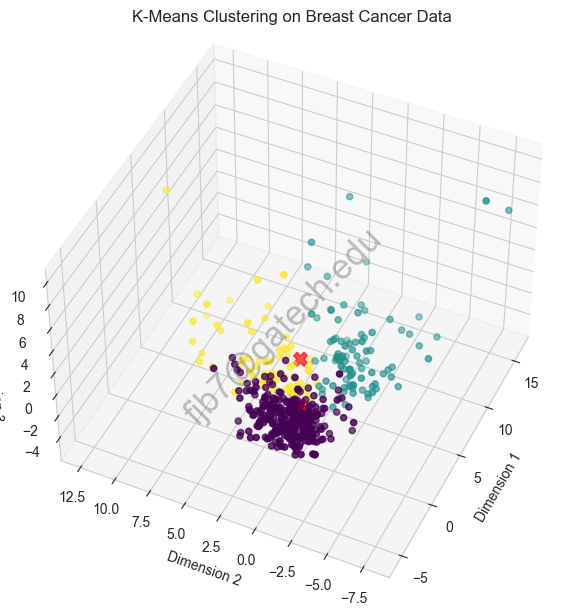

In [15]:
fig = plt.figure(figsize=(16, 8))

# Plot for Breast Cancer Data
ax2 = fig.add_subplot(1, 2, 1, projection='3d')  # Corrected index
ax2.view_init(azim=205, elev=45)
ax2.scatter(cancer_pca[:, 0], cancer_pca[:, 1], cancer_pca[:, 2], c=labels_cancer_kmeans, cmap='viridis', marker='o')
ax2.scatter(kmeans_cancer.cluster_centers_[:, 0], kmeans_cancer.cluster_centers_[:, 1], kmeans_cancer.cluster_centers_[:, 2], c='red', s=100, marker='X')
ax2.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
ax2.set_title('K-Means Clustering on Breast Cancer Data')
ax2.set_xlabel('Dimension 1')
ax2.set_ylabel('Dimension 2')
ax2.set_zlabel('Dimension 3')
plt.show()

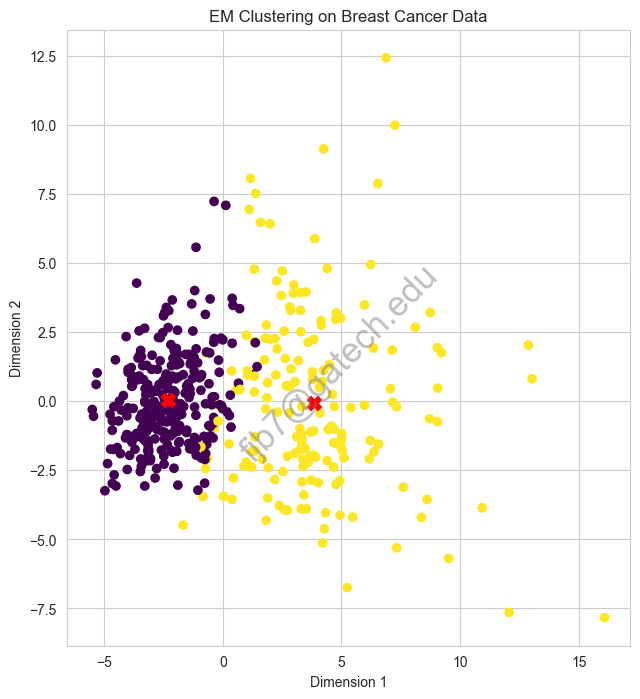

In [16]:
# Plot for Spam Data
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(1, 2, 1)  # Corrected index
centroids_cancer_gmm = gmm_cancer.means_
centroids_cancer_gmm_pca = pca_cancer.transform(centroids_cancer_gmm)
ax1.scatter(cancer_pca[:, 0], cancer_pca[:, 1], c=labels_cancer_gmm, cmap='viridis', marker='o')
ax1.scatter(centroids_cancer_gmm_pca[:, 0], centroids_cancer_gmm_pca[:, 1], c='red', s=100, marker='X')
ax1.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
ax1.set_title('EM Clustering on Breast Cancer Data')
ax1.set_xlabel('Dimension 1')
ax1.set_ylabel('Dimension 2')
plt.show()

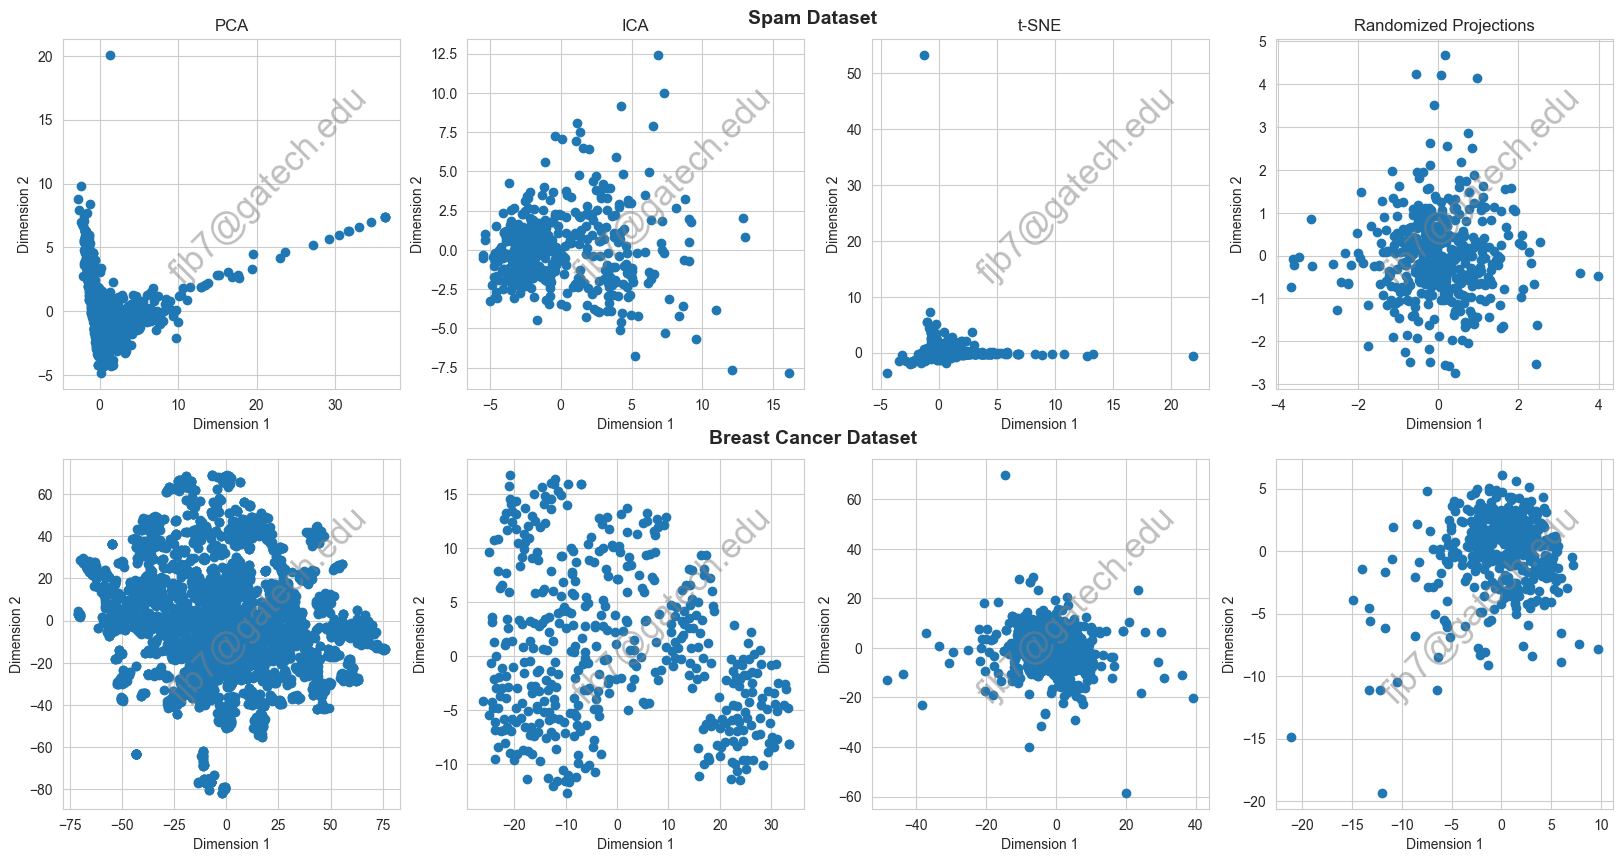

In [17]:
# Setting up the subplot grid
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows (datasets) and 4 columns (techniques)

# Row titles (datasets)
datasets = ['Spam Dataset', 'Breast Cancer Dataset']
for i, dataset in enumerate(datasets):
    # Use fig.text to place the dataset name centrally above each row
    fig.text(0.5, 0.9 - i*0.42, dataset, ha='center', va='center', fontsize=14, weight='bold')

# Column titles (dimensionality reduction techniques)
techniques = ['PCA', 'ICA', 't-SNE', 'Randomized Projections']
for ax, technique in zip(axs[0], techniques):
    ax.set_title(technique)

# Filling in the scatter plots and adding axis labels
for i, dataset in enumerate([spam_pca, cancer_pca, spam_ica, cancer_ica, spam_tsne, cancer_tsne, spam_rp, cancer_rp]):
    row, col = divmod(i, 4)
    axs[row, col].scatter(dataset[:, 0], dataset[:, 1])
    axs[row, col].set_xlabel('Dimension 1')  # X-axis label
    axs[row, col].set_ylabel('Dimension 2')  # Y-axis label
    axs[row, col].annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')

plt.show()

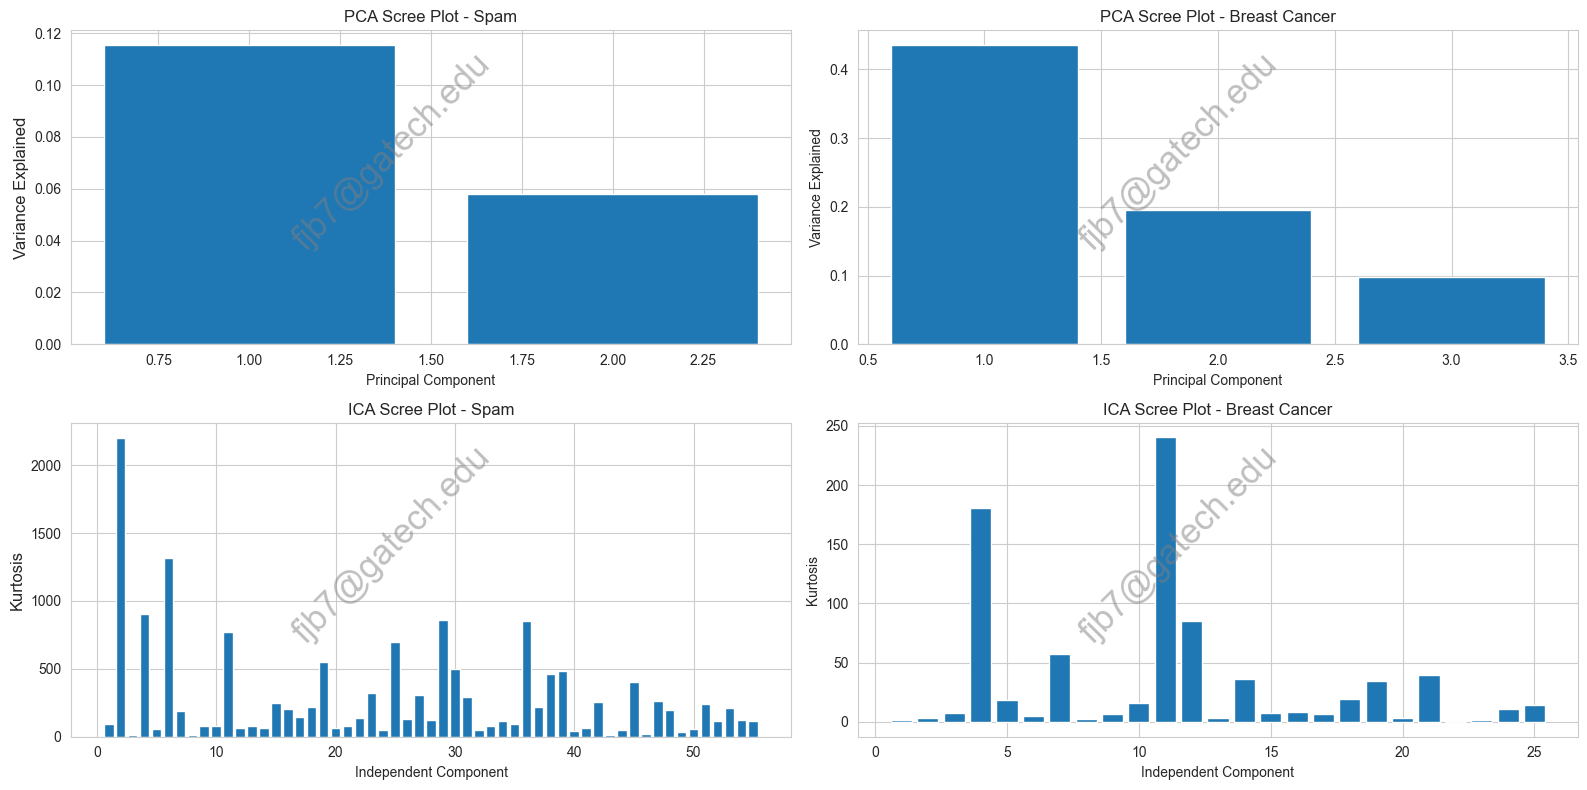

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))  # 2 rows (datasets) and 4 columns (plots)

# Column titles
columns = ['PCA Scree Plot', 'PCA Heatmap', 'ICA Scree Plot', 'ICA Heatmap']
for ax, col in zip(axs[0], columns):
    ax.set_title(col)

# Row titles (datasets)
datasets = ['Spam Dataset', 'Breast Cancer Dataset']
for ax, dataset in zip(axs[:,0], datasets):
    ax.set_ylabel(dataset, rotation=90, size='large')


# Function to create scree plot
def scree_plot(ax, pca, title):
    ax.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
    ax.set_xlabel('Principal Component')
    ax.set_ylabel('Variance Explained')
    ax.set_title(title)
    ax.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')

def ica_scree_plot(ax, ica_transformed_data, title):
    # Compute the kurtosis for each independent component
    kurtosis_values = kurtosis(ica_transformed_data, axis=0, fisher=True)  # Fisher's definition (normal ==> 0.0)
    
    # Plot the kurtosis values
    ax.bar(range(1, len(kurtosis_values) + 1), kurtosis_values)
    ax.set_xlabel('Independent Component')
    ax.set_ylabel('Kurtosis')
    ax.set_title(title)
    ax.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')


# Function to create heatmap
def heatmap(ax, components, title):
    sns.heatmap(components, ax=ax, cmap='viridis', annot=False)
    ax.set_xlabel('Feature')
    ax.set_ylabel('Component')
    ax.set_title(title)
    ax.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')



# Column titles
columns = ['PCA Scree Plot', 'ICA Scree Plots', 'PCA Heatmap', 'ICA Heatmap']
for ax, col in zip(axs[0], columns):
    ax.set_title(col)

# Row titles (datasets)
datasets = ['Spam Dataset', 'Breast Cancer Dataset']
for ax, dataset in zip(axs[:,0], datasets):
    ax.set_ylabel(dataset, rotation=90, size='large')

scree_plot(axs[0, 0], pca_spam, 'PCA Scree Plot - Spam')
scree_plot(axs[0, 1], pca_cancer, 'PCA Scree Plot - Breast Cancer')
ica_scree_plot(axs[1,0], spam_ica, 'ICA Scree Plot - Spam')
ica_scree_plot(axs[1,1], cancer_ica, 'ICA Scree Plot - Breast Cancer')

plt.tight_layout()
plt.show()


## Section 3: Re-Apply Clustering Algorithms to Reduced Datasets
### 3.1 - Expectation Maximization

In [19]:
# PCA Reduced Data
gmm_spam_pca, gmm_cancer_pca = GaussianMixture(n_components=2, random_state=randomization_seed), GaussianMixture(n_components=2, random_state=randomization_seed)
gmm_spam_pca.fit(spam_pca)
gmm_cancer_pca.fit(cancer_pca)

# ICA Reduced Data
gmm_spam_ica, gmm_cancer_ica = GaussianMixture(n_components=2, random_state=randomization_seed), GaussianMixture(n_components=2, random_state=randomization_seed)
gmm_spam_ica.fit(spam_ica)
gmm_cancer_ica.fit(cancer_ica)

# RP Reduced Data
gmm_spam_rp, gmm_cancer_rp = GaussianMixture(n_components=2, random_state=randomization_seed), GaussianMixture(n_components=2, random_state=randomization_seed)
gmm_spam_rp.fit(spam_rp)
gmm_cancer_rp.fit(cancer_rp)

# t-SNE reduced Data
gmm_spam_tsne, gmm_cancer_tsne = GaussianMixture(n_components=2, random_state=randomization_seed), GaussianMixture(n_components=2, random_state=randomization_seed)
gmm_spam_tsne.fit(spam_tsne)
gmm_cancer_tsne.fit(cancer_tsne)

GaussianMixture(n_components=2, random_state=42)

### 3.2 - K-Means Clustering

In [20]:
# PCA Reduced Data
kmeans_spam_pca, kmeans_cancer_pca = KMeans(n_clusters=2, random_state=randomization_seed), KMeans(n_clusters=2, random_state=randomization_seed)
kmeans_spam_pca.fit(spam_pca)
kmeans_cancer_pca.fit(cancer_pca)

# ICA Reduced Data
kmeans_spam_ica, kmeans_cancer_ica = KMeans(n_clusters=2, random_state=randomization_seed), KMeans(n_clusters=2, random_state=randomization_seed)
kmeans_spam_ica.fit(spam_ica)
kmeans_cancer_ica.fit(cancer_ica)

# RP Reduced Data
kmeans_spam_rp, kmeans_cancer_rp = KMeans(n_clusters=2, random_state=randomization_seed), KMeans(n_clusters=2, random_state=randomization_seed)
kmeans_spam_rp.fit(spam_rp)
kmeans_cancer_rp.fit(cancer_rp)

# t-SNE reduced Data
kmeans_spam_tsne, kmeans_cancer_tsne = KMeans(n_clusters=2, random_state=randomization_seed), KMeans(n_clusters=2, random_state=randomization_seed)
kmeans_spam_tsne.fit(spam_tsne)
kmeans_cancer_tsne.fit(cancer_tsne)

KMeans(n_clusters=2, random_state=42)

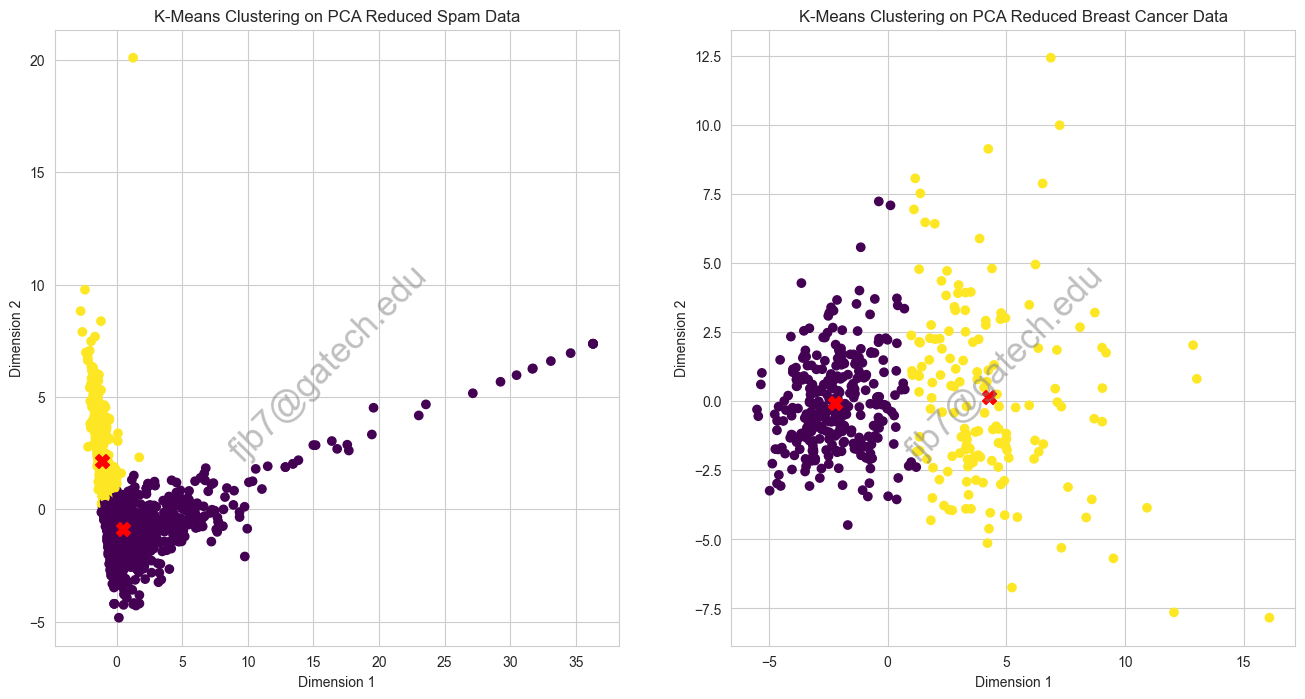

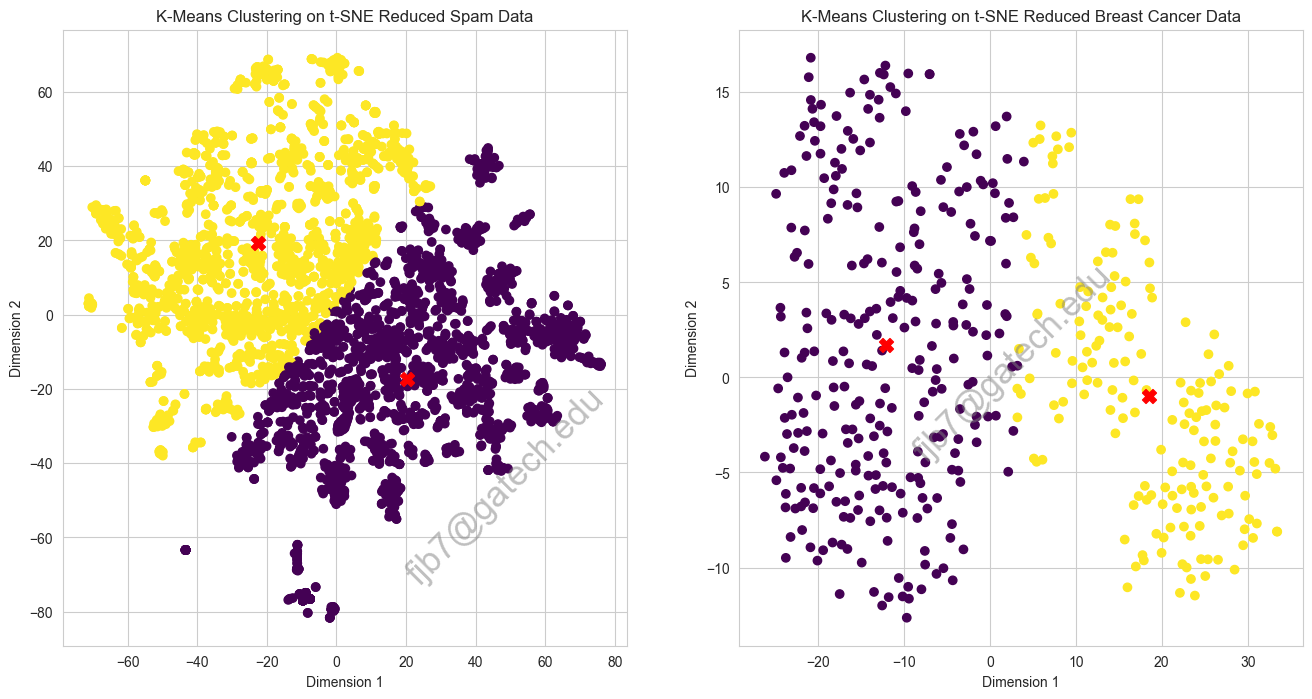

In [21]:
# Plot for Spam Data
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(1, 2, 1)  # Corrected index
ax1.scatter(spam_pca[:, 0], spam_pca[:, 1], c=kmeans_spam_pca.labels_, cmap='viridis', marker='o')
centroids = kmeans_spam_pca.cluster_centers_
ax1.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Centroids')
ax1.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
ax1.set_title('K-Means Clustering on PCA Reduced Spam Data')
ax1.set_xlabel('Dimension 1')
ax1.set_ylabel('Dimension 2')

# Plot for Spam Data
ax2 = fig.add_subplot(1, 2, 2)  # Corrected index
ax2.scatter(cancer_pca[:, 0], cancer_pca[:, 1], c=kmeans_cancer_pca.labels_, cmap='viridis', marker='o')
centroids = kmeans_cancer_pca.cluster_centers_
ax2.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Centroids')
ax2.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
ax2.set_title('K-Means Clustering on PCA Reduced Breast Cancer Data')
ax2.set_xlabel('Dimension 1')
ax2.set_ylabel('Dimension 2')

plt.show()

# Plot for Spam Data
fig = plt.figure(figsize=(16, 8))
ax3 = fig.add_subplot(1, 2, 1)  # Corrected index
ax3.scatter(spam_tsne[:, 0], spam_tsne[:, 1], c=kmeans_spam_tsne.labels_, cmap='viridis', marker='o')
centroids = kmeans_spam_tsne.cluster_centers_
ax3.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Centroids')
ax3.annotate('fjb7@gatech.edu', xy=(0.6, 0.1), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
ax3.set_title('K-Means Clustering on t-SNE Reduced Spam Data')
ax3.set_xlabel('Dimension 1')
ax3.set_ylabel('Dimension 2')

# Plot for Spam Data
ax4 = fig.add_subplot(1, 2, 2)  # Corrected index
ax4.scatter(cancer_tsne[:, 0], cancer_tsne[:, 1], c=kmeans_cancer_tsne.labels_, cmap='viridis', marker='o')
centroids = kmeans_cancer_tsne.cluster_centers_
ax4.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X', label='Centroids')
ax4.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
ax4.set_title('K-Means Clustering on t-SNE Reduced Breast Cancer Data')
ax4.set_xlabel('Dimension 1')
ax4.set_ylabel('Dimension 2')

plt.show()

## Section 4: Train Neural Network on Dimensionality Reduced Data

### 4.1 - Neural Network on PCA & ICA Reduced Data

In [22]:
# Per Hyper-Parameter tuning in A1, the best parameters are: {'hidden_layer_sizes': 50, 'learning_rate_init': 0.01}
nn_pca_cancer = MLPClassifier(hidden_layer_sizes=[50], solver='adam', activation='logistic', learning_rate_init=0.01, max_iter=4000, random_state=randomization_seed)
nn_pca_cancer.fit(cancer_pca, cancer_labels_train)

nn_ica_cancer = MLPClassifier(hidden_layer_sizes=[50], solver='adam', activation='logistic', learning_rate_init=0.01, max_iter=1000, random_state=randomization_seed)
nn_ica_cancer.fit(cancer_ica, cancer_labels_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=[50],
              learning_rate_init=0.01, max_iter=1000, random_state=42)

In [23]:
# Per Hyper-Parameter tuning in A1, the best parameters are: {'hidden_layer_sizes': 50, 'learning_rate_init': 0.01}
nn_pca_spam = MLPClassifier(hidden_layer_sizes=[50], solver='adam', activation='logistic', learning_rate_init=0.01, max_iter=4000, random_state=randomization_seed)
nn_pca_spam.fit(spam_pca, spam_labels_train)

nn_ica_spam = MLPClassifier(hidden_layer_sizes=[50], solver='adam', activation='logistic', learning_rate_init=0.01, max_iter=1000, random_state=randomization_seed)
nn_ica_spam.fit(spam_ica, spam_labels_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=[50],
              learning_rate_init=0.01, max_iter=1000, random_state=42)

### 4.2 - Neural Network on RP & t-SNE Reduced Data


In [24]:
# Per Hyper-Parameter tuning in A1, the best parameters are: {'hidden_layer_sizes': 50, 'learning_rate_init': 0.01}
nn_rp_cancer = MLPClassifier(hidden_layer_sizes=[50], solver='adam', activation='logistic', learning_rate_init=0.01, max_iter=4000, random_state=randomization_seed)
nn_rp_cancer.fit(cancer_rp, cancer_labels_train)

nn_tsne_cancer = MLPClassifier(hidden_layer_sizes=[50], solver='adam', activation='logistic', learning_rate_init=0.01, max_iter=4000, random_state=randomization_seed)
nn_tsne_cancer.fit(cancer_tsne, cancer_labels_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=[50],
              learning_rate_init=0.01, max_iter=4000, random_state=42)

In [25]:
# Per Hyper-Parameter tuning in A1, the best parameters are: {'hidden_layer_sizes': 50, 'learning_rate_init': 0.01}
nn_rp_spam = MLPClassifier(hidden_layer_sizes=[50], solver='adam', activation='logistic', learning_rate_init=0.01, max_iter=4000, random_state=randomization_seed)
nn_rp_spam.fit(spam_rp, spam_labels_train)

nn_tsne_spam = MLPClassifier(hidden_layer_sizes=[50], solver='adam', activation='logistic', learning_rate_init=0.01, max_iter=4000, random_state=randomization_seed)
nn_tsne_spam.fit(spam_tsne, spam_labels_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=[50],
              learning_rate_init=0.01, max_iter=4000, random_state=42)

### 4.3 - Plot Learning, Validation & Loss Curves


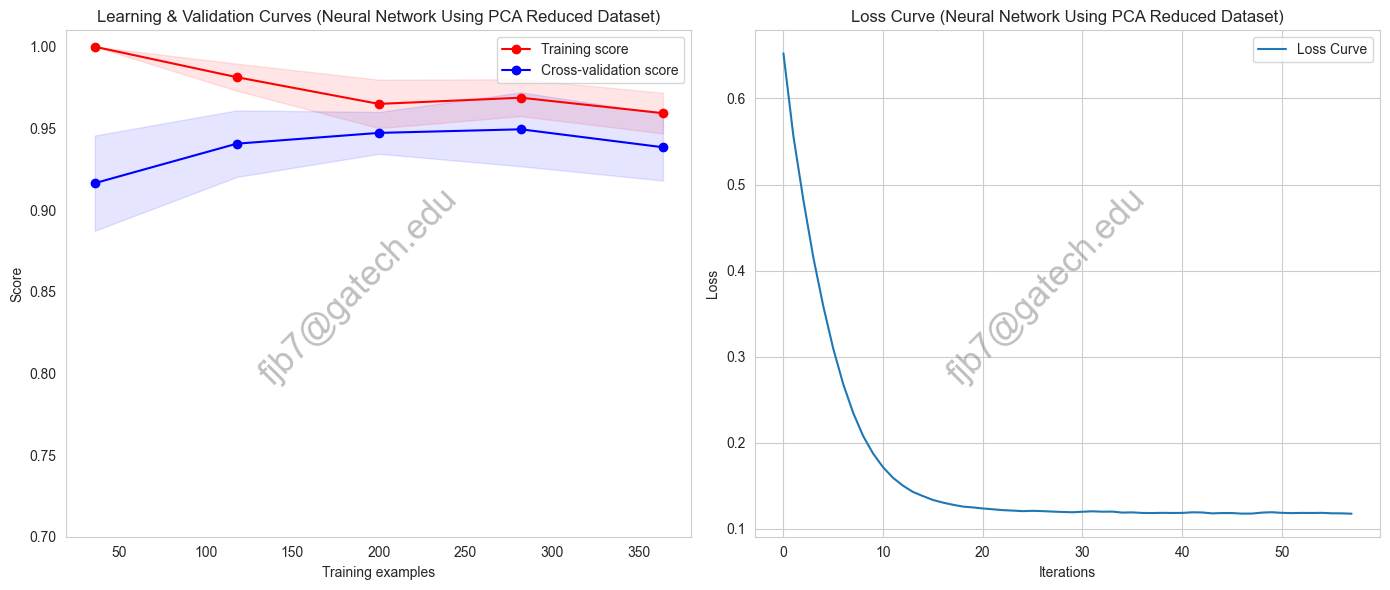

Model Evaluation Metrics - Test Dataset
*****************************************************
Model Training Time (s):   0.13036
Model Prediction Time (s): 0.00017

F1 Score:  0.99
Accuracy:  0.98     AUC:       0.98
Precision: 0.97     Recall:    1.00
*****************************************************


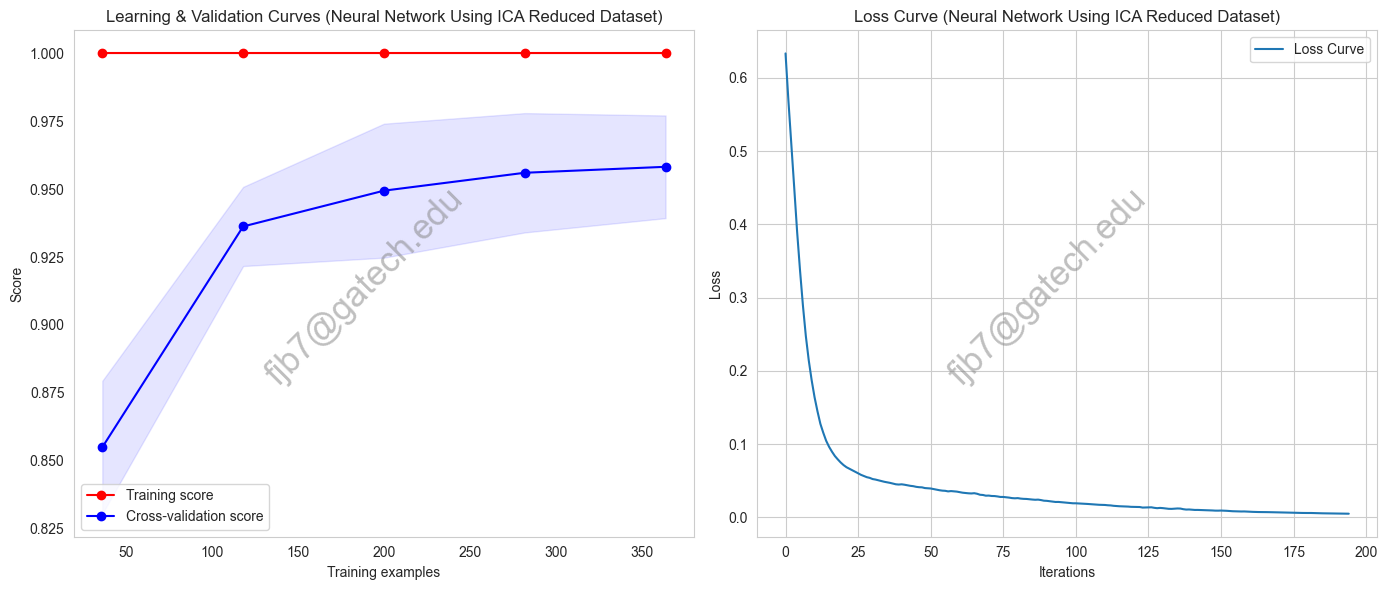

Model Evaluation Metrics - Test Dataset
*****************************************************
Model Training Time (s):   0.25285
Model Prediction Time (s): 0.00036

F1 Score:  0.93
Accuracy:  0.91     AUC:       0.91
Precision: 0.94     Recall:    0.92
*****************************************************


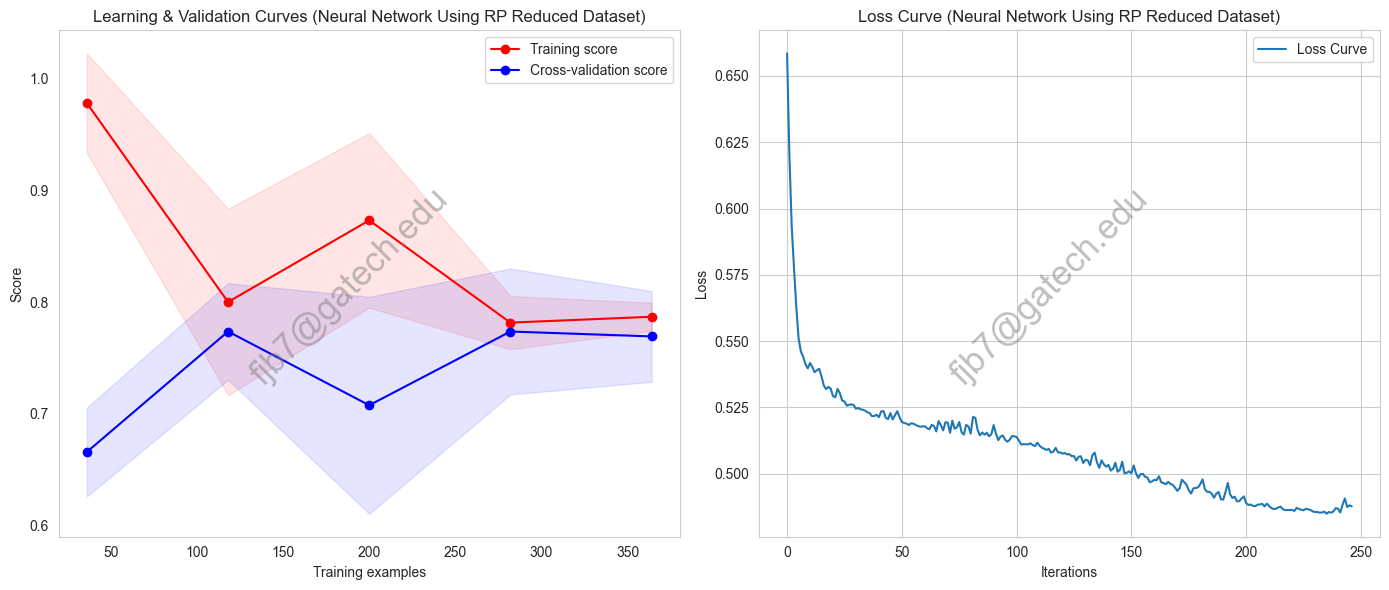

Model Evaluation Metrics - Test Dataset
*****************************************************
Model Training Time (s):   0.21728
Model Prediction Time (s): 0.00012

F1 Score:  0.84
Accuracy:  0.77     AUC:       0.71
Precision: 0.74     Recall:    0.97
*****************************************************


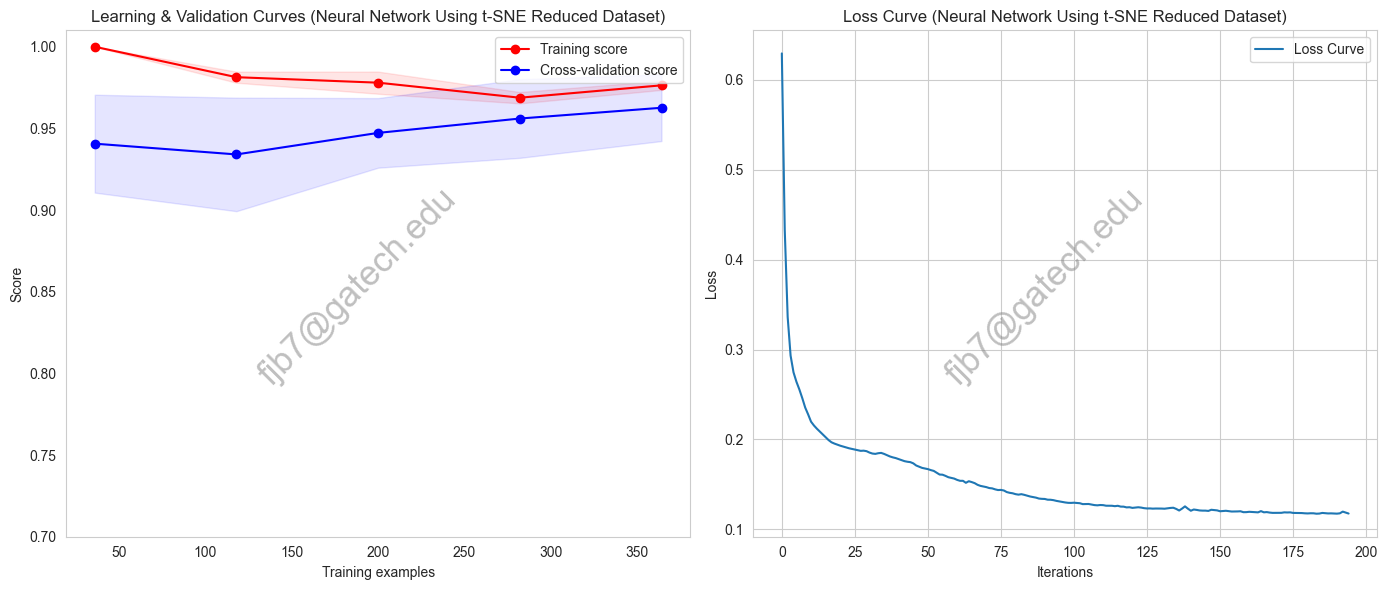

Model Evaluation Metrics - Test Dataset
*****************************************************
Model Training Time (s):   0.17085
Model Prediction Time (s): 0.00012

F1 Score:  0.77
Accuracy:  0.62     AUC:       0.50
Precision: 0.62     Recall:    1.00
*****************************************************


In [26]:
def plot_learning_curve(estimator, X, y, algorithm=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.title(f"Learning & Validation Curves ({algorithm})")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
    plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
    plt.legend(loc="best")
    
    plt.subplot(1, 2, 2)
    
    plt.title(f"Loss Curve ({algorithm})")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.plot(estimator.loss_curve_, label="Loss Curve")
    plt.legend(loc="best")
    plt.annotate('fjb7@gatech.edu', xy=(0.3, 0.3), xycoords='axes fraction', rotation=45, alpha=0.5, fontsize=25, color='gray')
    plt.tight_layout()
    return plt

def final_classifier_evaluation(clf,X_train, X_test, y_train, y_test):
    
    start_time = timeit.default_timer()
    clf.fit(X_train, y_train)
    end_time = timeit.default_timer()
    training_time = end_time - start_time
    
    start_time = timeit.default_timer()    
    y_pred = clf.predict(X_test)
    end_time = timeit.default_timer()
    pred_time = end_time - start_time
    
    auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)

    print("Model Evaluation Metrics - Test Dataset")
    print("*****************************************************")
    print("Model Training Time (s):   "+"{:.5f}".format(training_time))
    print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time))
    print("F1 Score:  "+"{:.2f}".format(f1))
    print("Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
    print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
    print("*****************************************************")

plot_learning_curve(nn_pca_cancer, cancer_pca, cancer_labels_train, algorithm="Neural Network Using PCA Reduced Dataset", ylim=(0.7, 1.01), cv=5, n_jobs=4)
plt.show()
cancer_pca_test = pca_cancer.transform(cancer_features_test)
final_classifier_evaluation(nn_pca_cancer, cancer_pca, cancer_pca_test, cancer_labels_train, cancer_labels_test)

plot_learning_curve(nn_ica_cancer, cancer_ica, cancer_labels_train, algorithm="Neural Network Using ICA Reduced Dataset", cv=5, n_jobs=4)
plt.show()
cancer_ica_test = ica_cancer.transform(cancer_features_test)
final_classifier_evaluation(nn_ica_cancer, cancer_ica, cancer_ica_test, cancer_labels_train, cancer_labels_test)

plot_learning_curve(nn_rp_cancer, cancer_rp, cancer_labels_train, algorithm="Neural Network Using RP Reduced Dataset", cv=5, n_jobs=4)
plt.show()
cancer_rp_test = rp_cancer.transform(cancer_features_test)
final_classifier_evaluation(nn_rp_cancer, cancer_rp, cancer_rp_test, cancer_labels_train, cancer_labels_test)

plot_learning_curve(nn_tsne_cancer, cancer_tsne, cancer_labels_train, algorithm="Neural Network Using t-SNE Reduced Dataset", ylim=(0.7, 1.01), cv=5, n_jobs=4)
plt.show()
cancer_tsne_test = TSNE(n_components=2, random_state=randomization_seed).fit_transform(cancer_features_test)
final_classifier_evaluation(nn_tsne_cancer, cancer_tsne, cancer_tsne_test, cancer_labels_train, cancer_labels_test)

## Section 5: Train Neural Network with new dataset generated from clusters in section 1
### 5.1 - Integrate generated cluster labels as a new feature in dataset

In [27]:
# Add EM cluster labels as a new feature
cancer_with_em = np.concatenate((cancer_features_train, labels_cancer_gmm.reshape(-1, 1)), axis=1)

test_cancer_labels_gmm = gmm_cancer.predict(cancer_features_test)
cancer_with_em_test = np.concatenate((cancer_features_test, test_cancer_labels_gmm.reshape(-1, 1)), axis=1)

# Add K-Means cluster labels as a new feature
cancer_with_kmeans = np.concatenate((cancer_features_train, labels_cancer_kmeans.reshape(-1, 1)), axis=1)

kmeans_cancer_test = KMeans(n_clusters=3, random_state=randomization_seed)
kmeans_cancer_test.fit(cancer_features_test)
labels_cancer_kmeans_test = kmeans_cancer_test.labels_
cancer_with_kmeans_test = np.concatenate((cancer_features_test, labels_cancer_kmeans_test.reshape(-1, 1)), axis=1)

### 5.2 - Rerun Neural Network Learner

In [28]:
nn_cancer_em, nn_cancer_kmeans = (
    MLPClassifier(hidden_layer_sizes=[50], solver='adam', activation='logistic', learning_rate_init=0.01, max_iter=4000, random_state=randomization_seed), 
    MLPClassifier(hidden_layer_sizes=[50], solver='adam', activation='logistic', learning_rate_init=0.01, max_iter=4000, random_state=randomization_seed)
)

nn_cancer_em.fit(cancer_with_em, cancer_labels_train)
nn_cancer_kmeans.fit(cancer_with_kmeans, cancer_labels_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=[50],
              learning_rate_init=0.01, max_iter=4000, random_state=42)

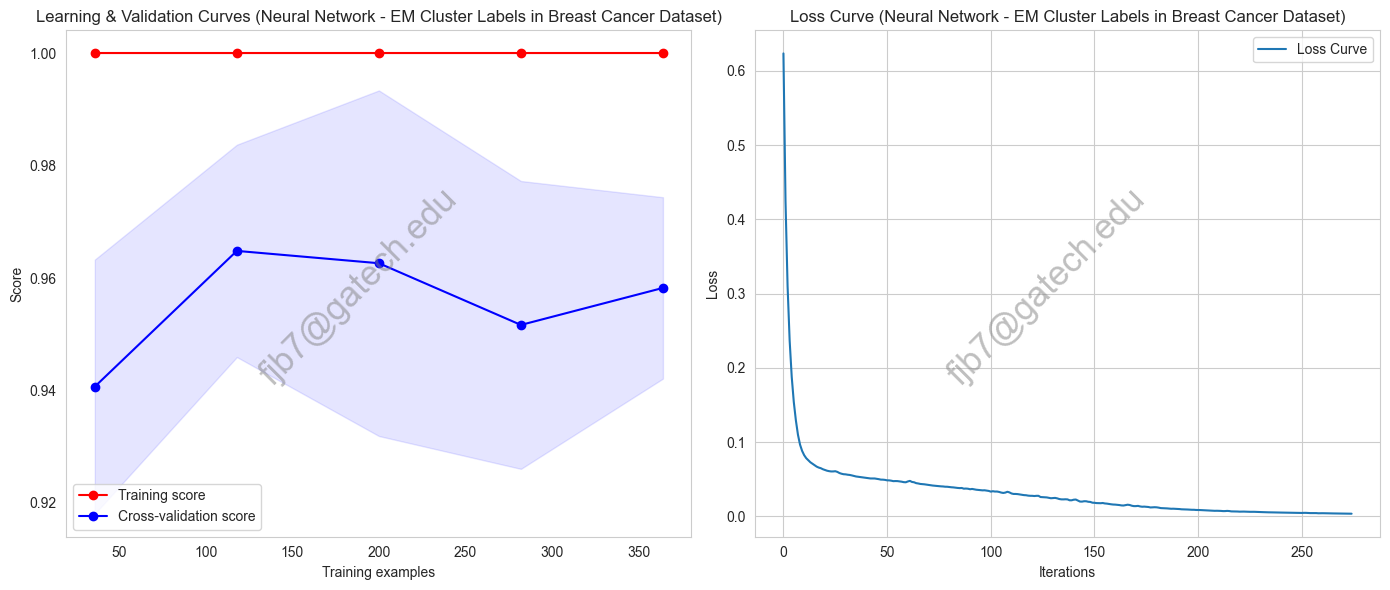

Model Evaluation Metrics - Test Dataset
*****************************************************
Model Training Time (s):   0.35210
Model Prediction Time (s): 0.00012

F1 Score:  0.98
Accuracy:  0.97     AUC:       0.97
Precision: 0.97     Recall:    0.99
*****************************************************


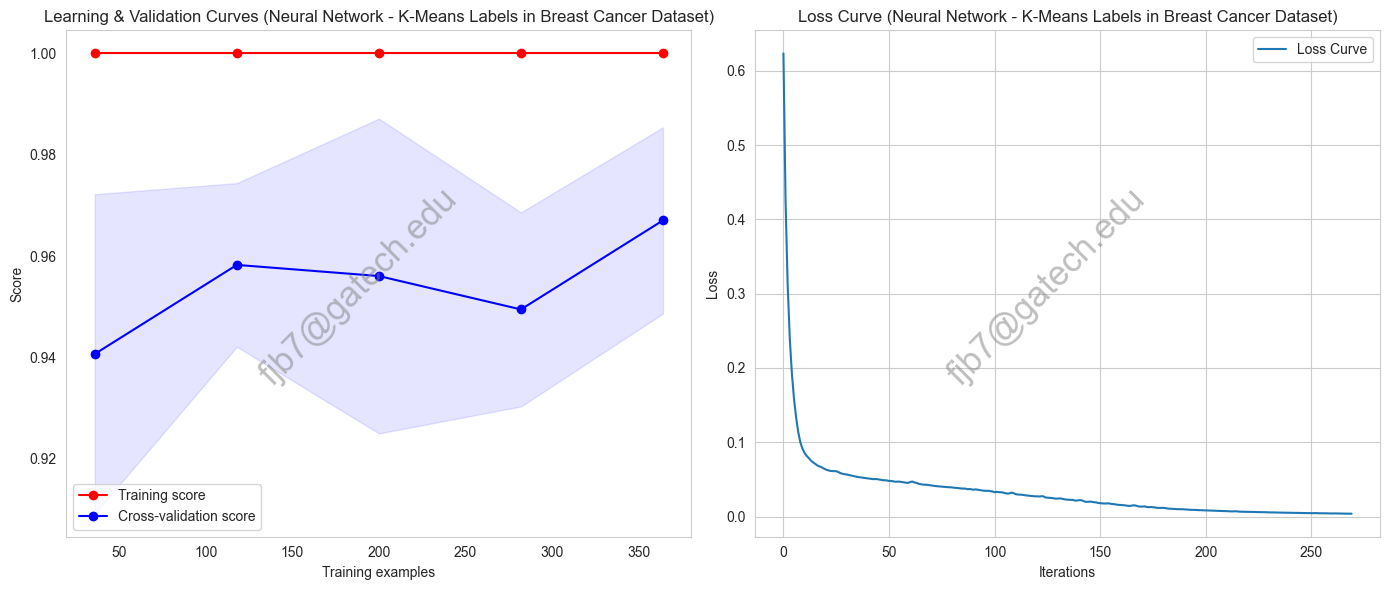

Model Evaluation Metrics - Test Dataset
*****************************************************
Model Training Time (s):   0.29950
Model Prediction Time (s): 0.00013

F1 Score:  0.99
Accuracy:  0.99     AUC:       0.99
Precision: 0.99     Recall:    1.00
*****************************************************


In [29]:
plot_learning_curve(nn_cancer_em, cancer_with_em, cancer_labels_train, algorithm="Neural Network - EM Cluster Labels in Breast Cancer Dataset",  cv=5, n_jobs=4)
plt.show()
final_classifier_evaluation(nn_cancer_em, cancer_with_em, cancer_with_em_test, cancer_labels_train, cancer_labels_test)


plot_learning_curve(nn_cancer_kmeans, cancer_with_kmeans, cancer_labels_train, algorithm="Neural Network - K-Means Labels in Breast Cancer Dataset", cv=5, n_jobs=4)
plt.show()
final_classifier_evaluation(nn_cancer_kmeans, cancer_with_kmeans, cancer_with_kmeans_test, cancer_labels_train, cancer_labels_test)
